# CNN Edge 2d

Nipun Batra  
2023-01-31

In [1]:
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
import seaborn as sns
%matplotlib inline

In [2]:
# Create a tensor of size 6x6 with first three columns as 1 and rest as 0
x = torch.zeros(6, 6)
x[:, :3] = 1
print(x)

tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.]])

In [3]:
x.shape

torch.Size([6, 6])

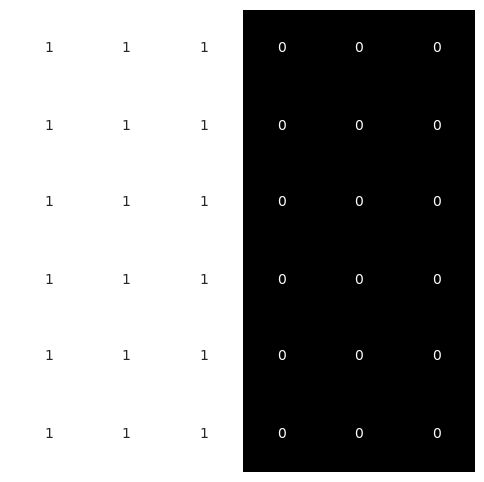

In [4]:
# Plot the tensor with equal aspect ratio
plt.figure(figsize=(6, 6))
sns.heatmap(x, cbar=False, xticklabels=False, yticklabels=False, cmap='gray', annot=True)

In [5]:
# Create a 3x3 kernel with first column as 1, second as 0 and third as -1

k = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).float()
print(k)

tensor([[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]])

tensor([[[[0., 3., 3., 0.],
          [0., 3., 3., 0.],
          [0., 3., 3., 0.],
          [0., 3., 3., 0.]]]])

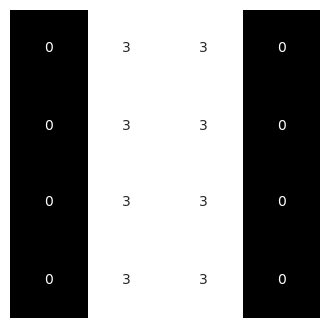

In [6]:
# Apply the kernel to the image


y = F.conv2d(x.view(1, 1, 6, 6), k.view(1, 1, 3, 3))
print(y)

# Create figure of size of y
plt.figure(figsize=(y.shape[2], y.shape[3]))
sns.heatmap(y[0, 0], cbar=False, xticklabels=False, yticklabels=False, cmap='gray', annot=True)

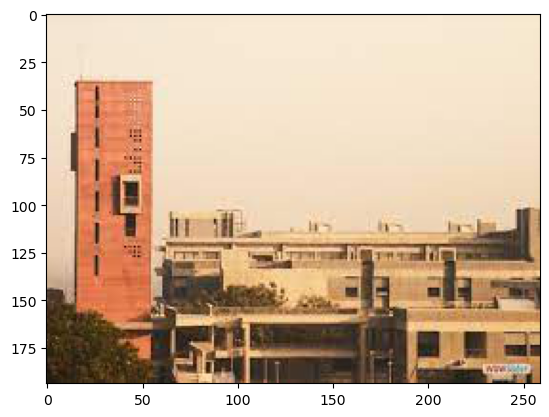

In [7]:
im = plt.imread('lm.jpeg')
plt.imshow(im)

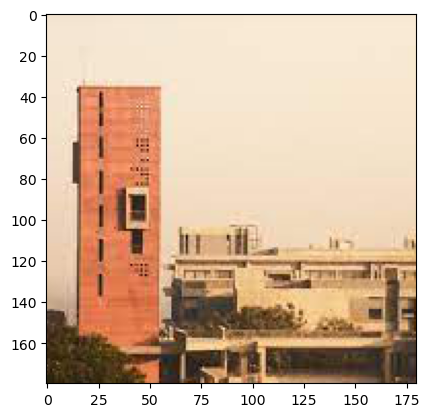

In [8]:
# Crop to left 180 X 180 pixels

im = im[:180, :180]
plt.imshow(im, cmap='gray')

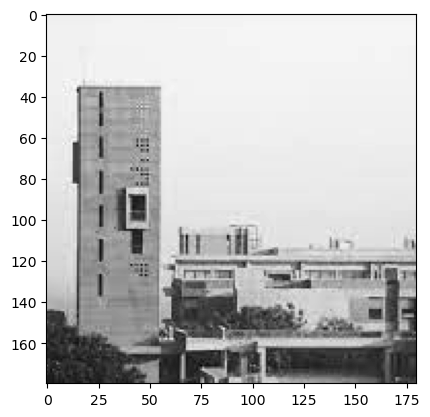

In [9]:
# Convert to grayscale
im = im.mean(axis=2)
plt.imshow(im, cmap='gray')

In [10]:
im.shape

(180, 180)

In [11]:
# Detect edges using our filter

k = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).float()

# Apply the kernel to the image
y = F.conv2d(torch.tensor(im).float().view(1, 1, 180, 180), k.view(1, 1, 3, 3))



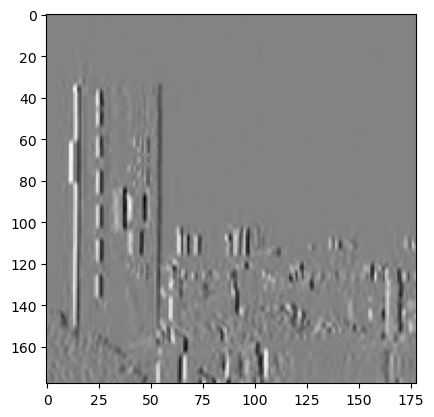

In [13]:
# plot the result
#plt.figure(figsize=(y.shape[2], y.shape[3]))
plt.imshow(y[0, 0], cmap='gray')

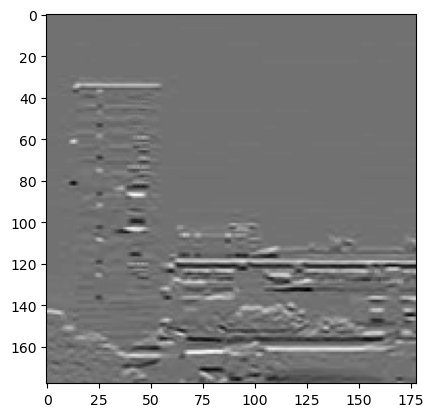

In [14]:
# Detect horizontal edges using our filter

k = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).float().T

# Apply the kernel to the image
y = F.conv2d(torch.tensor(im).float().view(1, 1, 180, 180), k.view(1, 1, 3, 3))
plt.imshow(y[0, 0], cmap='gray')